This Is a cleaned up version of the first notebook to start asking quesitons about learning. 

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020202050,20201028,1,0
1,1,1,A,0,805020202050,20201028,1,1
2,2,2,A,0,805020202050,20201028,1,2
3,3,3,B,1,805020202050,20201028,1,3
4,4,4,B,0,805020202050,20201028,1,4
...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175
13289,13289,1,A,0,508020208020,20201107,6,176
13290,13290,2,A,0,508020208020,20201107,6,177
13291,13291,1,A,1,508020208020,20201107,6,178


In [31]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?

#        df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
del df['diff_cont']

In [32]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,stemChange
0,0,4,B,1,805020202050,20201028,1,0,1,1,0
1,1,1,A,0,805020202050,20201028,1,1,1,1,1
2,2,2,A,0,805020202050,20201028,1,2,1,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1
4,4,4,B,0,805020202050,20201028,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,0


In [33]:
#add new col to df with global nominal avg for contingencies so can compare accross them. 
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
    

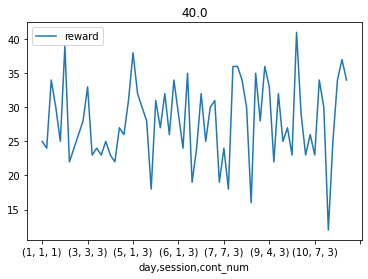

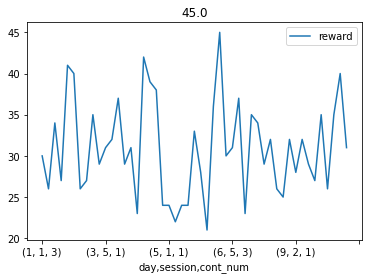

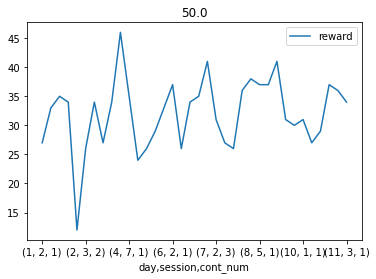

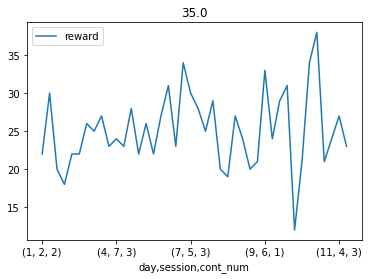

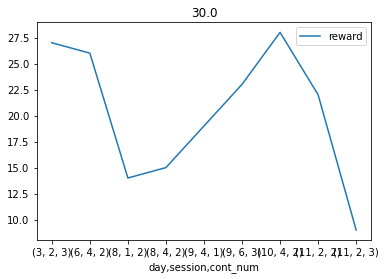

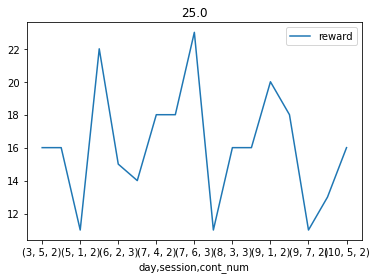

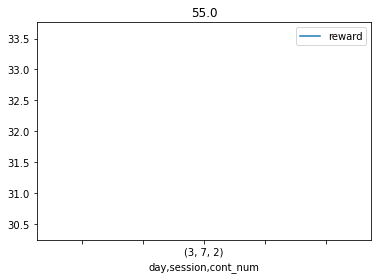

In [34]:
df['glob_nom_avg'].unique()

for ix in range(len(df['glob_nom_avg'].unique())):
    all_same = df[(df['glob_nom_avg']== (df['glob_nom_avg'].unique()[ix]))]
    group_by=['day','session' ,'cont_num']
    rew_for_805020202050 = pd.DataFrame(all_same.groupby(group_by)['reward'].sum()).plot(title=df['glob_nom_avg'].unique()[ix])
#plotting 1 at a time below
# group_by=['day','session' ,'cont_num']
# rew_for_805020202050 = pd.DataFrame(all_same.groupby(group_by)['reward'].sum()).plot()

In [35]:
#finding best stem, adding to new col in df
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    avg_A= statistics.mean(cont[0:2])
    avg_B = statistics.mean(cont[2:4])
    avg_C= statistics.mean(cont[4:6])
    if (avg_A > avg_B) & (avg_A> avg_C):
        best_stem = 'A'
    elif (avg_B > avg_A) & (avg_B> avg_C):
        best_stem = 'B'
    elif (avg_C > avg_B) & (avg_C>avg_A):
        best_stem = 'C'    
    df.loc[ix, 'best_stem'] = best_stem
    

In [36]:
# for every cont, find prop of trials spent at best stem 

#this method isn't wroking for me, because of multidimensional df output. 

# group_by=['day','session' ,'cont_num','stem']
# new_df = pd.DataFrame(df.groupby(group_by)['stem'].count())
# new_df['best_stem'] = df.groupby(group_by)['best_stem'].max(1)
# new_df

In [37]:
#make new col in df counting number of visits to each stem 
df['chose_a'] = np.where(df['stem']== 'A', 1, 0)
df['chose_b'] = np.where(df['stem']== 'B', 1, 0)
df['chose_c'] = np.where(df['stem']== 'C', 1, 0)



In [38]:
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum()
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,stemChange,glob_nom_avg,best_stem,chose_a,chose_b,chose_c,new_cont
0,0,4,B,1,805020202050,20201028,1,0,1,1,0,40.0,A,0,1,0,1
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,40.0,A,1,0,0,1
2,2,2,A,0,805020202050,20201028,1,2,1,1,0,40.0,A,1,0,0,1
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,40.0,A,0,1,0,1
4,4,4,B,0,805020202050,20201028,1,4,1,1,0,40.0,A,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,0,45.0,A,1,0,0,222
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,0,45.0,A,1,0,0,222
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,0,45.0,A,1,0,0,222
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,0,45.0,A,1,0,0,222


In [39]:
#make new df with num visits to each stem plus best stem of contint. Also basically all other metadata for contingency to make further comparisons
df_choice = pd.DataFrame()
for cont in range(1,df['new_cont'].max()+1):
    num_a = (df[df['new_cont'] ==cont]['chose_a']).sum()
    num_b = (df[df['new_cont'] ==cont]['chose_b']).sum()
    num_c = (df[df['new_cont'] ==cont]['chose_c']).sum()
    best_stem = (df[df['new_cont'] ==cont]['best_stem']).max()
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
    glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    df_choice.loc[cont,'num_a'] = num_a
    df_choice.loc[cont,'num_b'] = num_b
    df_choice.loc[cont,'num_c'] = num_c
    df_choice.loc[cont, 'best_stem'] = best_stem
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew


In [40]:
for cont in range(1,len(df_choice)+1):
    if df_choice.loc[cont,'best_stem'] == 'A':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_a']/60
    elif df_choice.loc[cont,'best_stem'] == 'B':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_b']/60
    elif df_choice.loc[cont,'best_stem'] == 'C':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_c']/60    
        
df_choice



,num_a,num_b,num_c,best_stem,cont_num,day,session,contingency,glob_nom_avg,num_rew,prop_at_best
1,29.0,16.0,15.0,A,1.0,1.0,1.0,8.050202e+11,40.0,25.0,0.483333
2,27.0,9.0,24.0,C,2.0,1.0,1.0,2.020502e+11,40.0,24.0,0.400000
3,35.0,14.0,11.0,B,3.0,1.0,1.0,2.080508e+11,45.0,30.0,0.233333
4,20.0,16.0,24.0,C,1.0,1.0,2.0,5.020208e+11,50.0,27.0,0.400000
5,42.0,8.0,10.0,A,2.0,1.0,2.0,5.050502e+11,35.0,22.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
218,7.0,0.0,53.0,C,2.0,11.0,5.0,2.020208e+11,45.0,40.0,0.883333
219,22.0,10.0,28.0,A,3.0,11.0,5.0,5.050202e+11,35.0,23.0,0.366667
220,7.0,6.0,47.0,C,1.0,11.0,6.0,2.020205e+11,40.0,37.0,0.783333
221,0.0,48.0,12.0,B,2.0,11.0,6.0,5.020805e+11,40.0,34.0,0.800000


In [41]:
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())



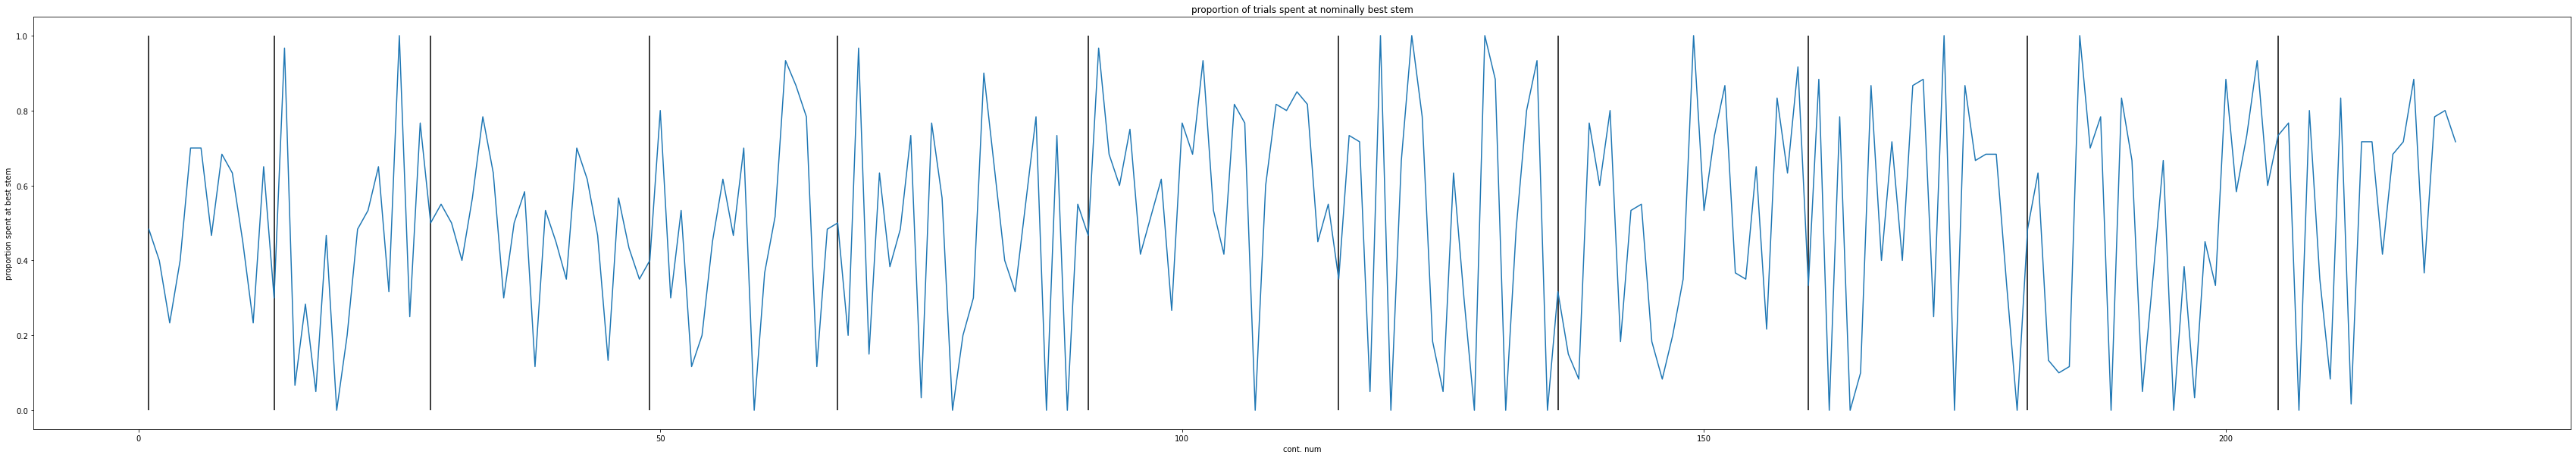

In [42]:
plt.figure(figsize=(60,10))
plt.plot(df_choice['prop_at_best'])
plt.title('proportion of trials spent at nominally best stem')
plt.xlabel("cont. num")
plt.ylabel('proportion spent at best stem')
plt.vlines(df_choice[df_choice['day_chng']].index,0,1,color='k',alpha=1)

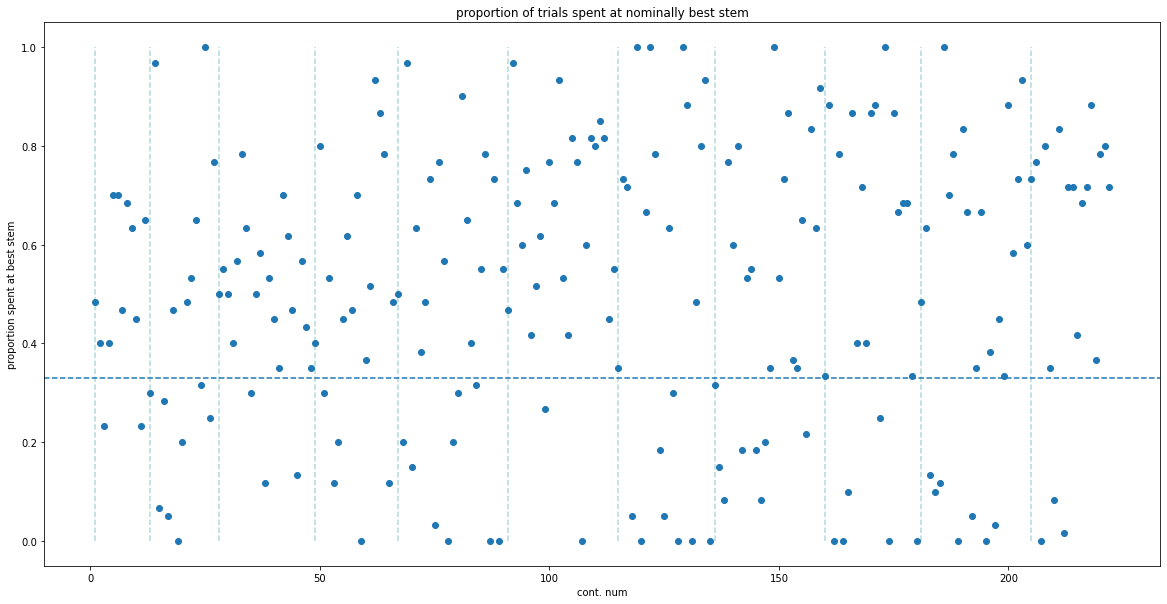

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(df_choice.index,df_choice['prop_at_best'])
plt.title('proportion of trials spent at nominally best stem')
plt.xlabel("cont. num")
plt.ylabel('proportion spent at best stem')
plt.axhline(.33,ls='--')
plt.vlines(df_choice[df_choice['day_chng']].index,0,1,colors='teal', ls='--',alpha=0.3)

Text(0, 0.5, 'prop time spent at best stem')

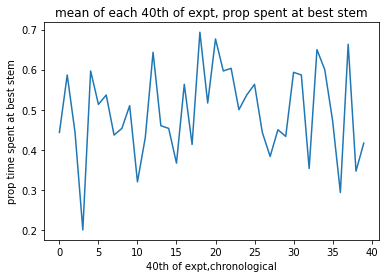

In [44]:
#takes col from df about prop at best stem for each cont, 
#then for loop breaks it into fractions of experiment, the number of fractions
#changed by num_splits. Takes mean of that fraction, can find how much time he spent at best stem over experiment. 
#do have to change titles/labels of final figure for now 

prop_at_best = df_choice['prop_at_best']
num_splits = 40
list_of_prop_best_stem =[]
for ix in range(1,num_splits+1):
    if ix ==1:
        list_of_prop_best_stem.append(statistics.mean((prop_at_best[0:int(222/num_splits)])))
    else:
        list_of_prop_best_stem.append(statistics.mean(prop_at_best[((ix-1)*int(222/num_splits)):(ix)*int(222/num_splits)]))
list_of_prop_best_stem        
plt.plot(list_of_prop_best_stem)
plt.title('mean of each 40th of expt, prop spent at best stem')
plt.xlabel('40th of expt,chronological')
plt.ylabel('prop time spent at best stem')


Text(0.5, 1.0, 'when not at best for 33% of cont, how many rew did he get')

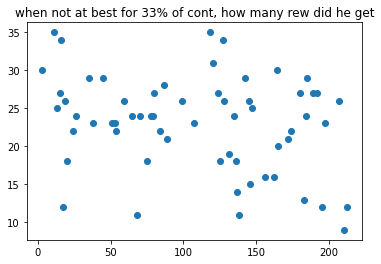

In [45]:
#now I want to know if theres a pattern,
#when does he not spend the most time at the best stem? 
#The other thought is that nominal prop may not be the best way to do this? Should consider experienced rew

not_at_best = df_choice[df_choice['prop_at_best']<=.33]
plt.scatter(not_at_best.index, not_at_best['num_rew'])
plt.title('when not at best for 33% of cont, how many rew did he get')

Text(0.5, 0, 'num_rewards')

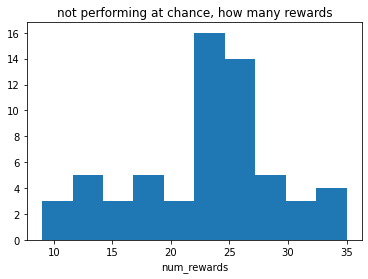

In [46]:
plt.hist(not_at_best['num_rew'])
plt.title('not performing at chance, how many rewards')
plt.xlabel('num_rewards')

Text(0.5, 0, 'num_rewards')

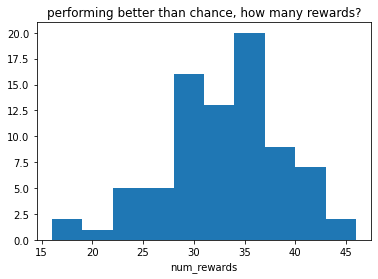

In [47]:
#how often doe she spend over 66% of time at best stem over days? 
at_best = df_choice[df_choice['prop_at_best']>=.66]
at_best
# plt.scatter(at_best.index, at_best['cont_num'])
# plt.title('when at best for 66%% of cont, what cont is it?')
plt.hist(at_best['num_rew'])
plt.title('performing better than chance, how many rewards?')
plt.xlabel('num_rewards')

In [48]:
#prop time spent at worst stem- should go way down over time 
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    avg_A= statistics.mean(cont[0:2])
    avg_B = statistics.mean(cont[2:4])
    avg_C= statistics.mean(cont[4:6])
    if (avg_A < avg_B) & (avg_A< avg_C):
        worst_stem = 'A'
    elif (avg_B < avg_A) & (avg_B< avg_C):
        worst_stem = 'B'
    elif (avg_C < avg_B) & (avg_C<avg_A):
        best_stem = 'C'    
    df.loc[ix, 'worst_stem'] = worst_stem

    
df_bad_choice = pd.DataFrame()
for cont in range(1,df['new_cont'].max()+1):
    num_a = (df[df['new_cont'] ==cont]['chose_a']).sum()
    num_b = (df[df['new_cont'] ==cont]['chose_b']).sum()
    num_c = (df[df['new_cont'] ==cont]['chose_c']).sum()
    worst_stem = (df[df['new_cont'] ==cont]['worst_stem']).max()
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
    glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    df_bad_choice.loc[cont,'num_a'] = num_a
    df_bad_choice.loc[cont,'num_b'] = num_b
    df_bad_choice.loc[cont,'num_c'] = num_c
    df_bad_choice.loc[cont, 'worst_stem'] = worst_stem
    df_bad_choice.loc[cont,'cont_num'] = cont_num
    df_bad_choice.loc[cont,'day'] = day_num
    df_bad_choice.loc[cont,'session'] = session_num
    df_bad_choice.loc[cont,'contingency'] = cont_vals
    df_bad_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_bad_choice.loc[cont,'num_rew'] = num_rew
    
for cont in range(1,len(df_bad_choice)+1):
    if df_bad_choice.loc[cont,'worst_stem'] == 'A':
        df_bad_choice.loc[cont, 'prop_at_worst'] = df_bad_choice.loc[cont, 'num_a']/60
    elif df_bad_choice.loc[cont,'worst_stem'] == 'B':
        df_bad_choice.loc[cont, 'prop_at_worst'] = df_bad_choice.loc[cont, 'num_b']/60
    elif df_bad_choice.loc[cont,'worst_stem'] == 'C':
        df_bad_choice.loc[cont, 'prop_at_worst'] = df_bad_choice.loc[cont, 'num_c']/60    
        
df_bad_choice





,num_a,num_b,num_c,worst_stem,cont_num,day,session,contingency,glob_nom_avg,num_rew,prop_at_worst
1,29.0,16.0,15.0,B,1.0,1.0,1.0,8.050202e+11,40.0,25.0,0.266667
2,27.0,9.0,24.0,A,2.0,1.0,1.0,2.020502e+11,40.0,24.0,0.450000
3,35.0,14.0,11.0,A,3.0,1.0,1.0,2.080508e+11,45.0,30.0,0.583333
4,20.0,16.0,24.0,A,1.0,1.0,2.0,5.020208e+11,50.0,27.0,0.333333
5,42.0,8.0,10.0,A,2.0,1.0,2.0,5.050502e+11,35.0,22.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
218,7.0,0.0,53.0,A,2.0,11.0,5.0,2.020208e+11,45.0,40.0,0.116667
219,22.0,10.0,28.0,B,3.0,11.0,5.0,5.050202e+11,35.0,23.0,0.166667
220,7.0,6.0,47.0,A,1.0,11.0,6.0,2.020205e+11,40.0,37.0,0.116667
221,0.0,48.0,12.0,A,2.0,11.0,6.0,5.020805e+11,40.0,34.0,0.000000


In [58]:
#just an example to show the messed up contingency things
df_bad_choice[df_bad_choice['cont_num']==4]

,num_a,num_b,num_c,worst_stem,cont_num,day,session,contingency,glob_nom_avg,num_rew,prop_at_worst
27,0.0,46.0,14.0,B,4.0,2.0,5.0,2.050508e+11,45.0,40.0,0.766667


Text(0, 0.5, 'prop time spent at worst stem')

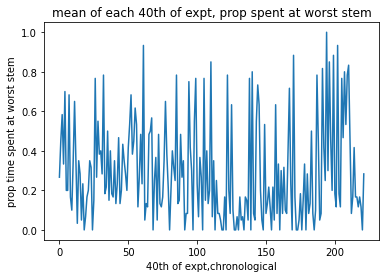

In [49]:
prop_at_worst = df_bad_choice['prop_at_worst']
num_splits = 222
list_of_prop_worst_stem =[]
for ix in range(1,num_splits+1):
    if ix ==1:
        list_of_prop_worst_stem.append(statistics.mean((prop_at_worst[0:int(222/num_splits)])))
    else:
        list_of_prop_worst_stem.append(statistics.mean(prop_at_worst[((ix-1)*int(222/num_splits)):(ix)*int(222/num_splits)]))
list_of_prop_worst_stem        
plt.plot(list_of_prop_worst_stem)
plt.title('mean of each 40th of expt, prop spent at worst stem')
plt.xlabel('40th of expt,chronological')
plt.ylabel('prop time spent at worst stem')

Text(0.5, 0, 'day')

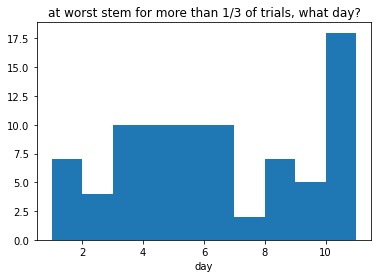

In [50]:
at_worst_for_most = df_bad_choice[df_bad_choice['prop_at_worst']>=.33]
# plt.scatter(at_best.index, at_best['cont_num'])
# plt.title('when at best for 66%% of cont, what cont is it?')
plt.hist(at_worst_for_most['day'])
plt.title('at worst stem for more than 1/3 of trials, what day?')
plt.xlabel('day')

In [51]:
# now id like to look at the experienced rew rate at the end of every cont and calc same metrics. 
#ill start by looking at the whole contignecy, how many rew total/num visits to each leaf. 

# depletion!!! 

In [52]:
df1 = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_depletion_data.csv')
df1['day']= df1['date'].ne(df1['date'].shift()).cumsum()
df1["stemChange"] = (df1["stem"].shift(1, fill_value=df1["stem"].head(1)) != df1["stem"]).astype(int)



67

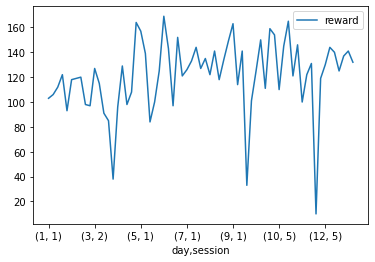

In [53]:
group_by=['day','session']
rew= pd.DataFrame(df1.groupby(group_by)['reward'].sum()).plot()
len(pd.DataFrame(df1.groupby(group_by)['reward'].sum()))

<AxesSubplot:xlabel='day,session'>

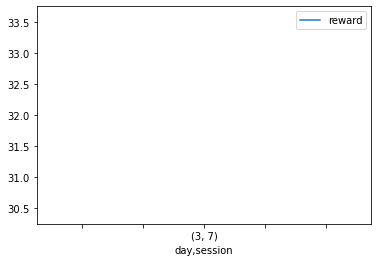

In [54]:
pd.DataFrame(all_same.groupby(group_by)['reward'].sum()).plot()

In [55]:
df1

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,stemChange
0,0,4,B,1,805020802050,20201109,1,0,1,0
1,1,3,B,0,805020642050,20201109,1,1,1,0
2,2,4,B,1,805016642050,20201109,1,2,1,0
3,3,3,B,0,805016512050,20201109,1,3,1,0
4,4,4,B,0,805012512050,20201109,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,0
19000,19000,6,C,1,202080204064,20201121,5,296,13,0
19001,19001,5,C,1,202080204051,20201121,5,297,13,0
19002,19002,6,C,0,202080203251,20201121,5,298,13,0


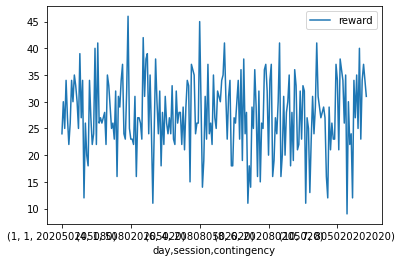

In [56]:
group_by=['day','session','contingency']
rew= pd.DataFrame(df.groupby(group_by)['reward'].sum()).plot()